In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../Datasets/height-weight.csv')

In [4]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 500.0 bytes


Text(0.5, 0, 'Height')

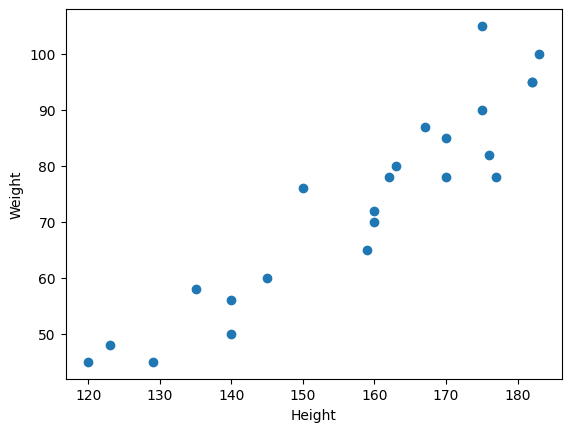

In [6]:
plt.scatter(df['Height'],df['Weight'])
plt.ylabel("Weight")
plt.xlabel("Height")

In [7]:
#divide the datasets into independent and dependent feature
X = df["Height"]
y = df["Weight"]

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [9]:
X_train.head()

12    175
1     135
13    183
5     162
2     123
Name: Height, dtype: int64

In [12]:
# Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

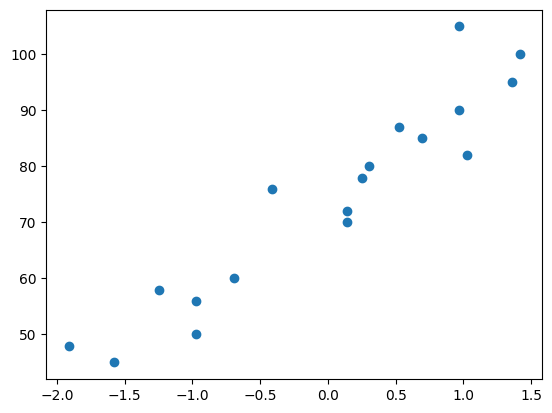

In [13]:
plt.scatter(X_train,y_train)

In [15]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression

LinearRegression()

In [16]:
regression.fit(X_train,y_train)

LinearRegression()

In [18]:
# Cofficient and intercept
print("Coefficient : ", regression.coef_)
print('Intercept : ', regression.intercept_)

Coefficient :  [[16.71556824]]
Intercept :  [74.27777778]


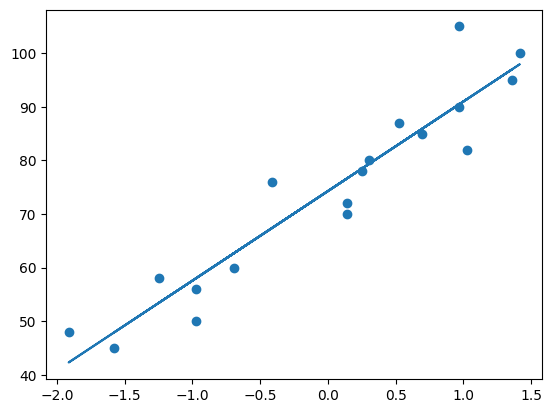

In [19]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))

In [20]:
y_pred_test = regression.predict(X_test)

In [21]:
y_test

15    78
9     78
0     45
8     95
17    65
Name: Weight, dtype: int64

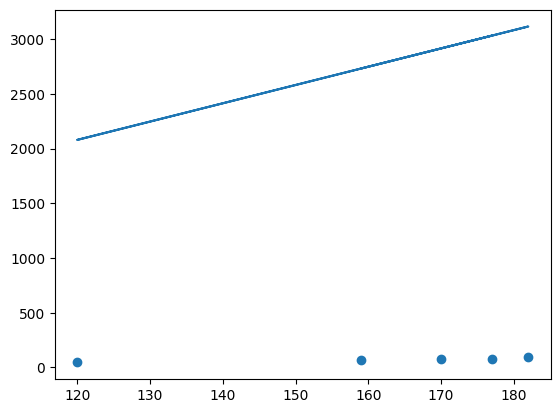

In [24]:
y_test = np.array(y_test).reshape(-1,1)
y_test = scaler.transform(y_test)
plt.scatter(X_test,y_test)
plt.plot(X_test,regression.predict(X_test))

In [26]:
#performance metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae = mean_absolute_error(y_test,y_pred_test)
mse = mean_squared_error(y_test,y_pred_test)
rmse = np.sqrt(mse)
score = r2_score(y_test,y_pred_test)
print('mean_absolute_error :', mae)
print('mean_squared_error :',mse)
print('root mean squared error', rmse)
print('score :',score)

mean_absolute_error : 2703.3136050388375
mean_squared_error : 7433993.463689327
root mean squared error 2726.5350655528578
score : -26957.200840184676
